In [1]:
!pip install MiniSom

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for MiniSom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=f222265ccb6bf34ac0be001a32c3e9c5fe8fbcc39ef96c3d2358877d23ee2909
  Stored in directory: c:\users\jackson simionato\appdata\local\pip\cache\wheels\8f\27\d8\3b73a7a174e55087f3133c7592f224fdd77d746bccd441fbec
Successfully built MiniSom


In [2]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Leitua da img
img = plt.imread('../../data/imagem_SOM/LooneyTunes.png')

In [9]:
img.shape

(420, 510, 3)

In [7]:
# Transformação em vetor bidimensional
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3))
print(pixels.shape)
pixels

(214200, 3)


array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       ...,
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [11]:
# Reajuste para vetor tridimensional, dimensões 20x20x3
print('Treinamento..')
# sigma: controla o raio inicial de influência dos neurônios vizinhos durante o treinamento.
# neighborhood_function: determina como a influência dos neurônios vizinhos se propaga durante o treinamento
som = MiniSom(20, 20, 3, sigma=0.2, learning_rate=0.1, neighborhood_function='bubble', topology='hexagonal')

# Atribuindo pesos
som.random_weights_init(pixels)

# Cálculo da função discriminante para cada peso da rede
starting_weights = som.get_weights().copy()

# Aumento das épocas de treinamento
som.train_random(pixels, 1000)

Treinamento..


In [12]:
print('Quantização...')
qnt = som.quantization(pixels)

Quantização...


c:\Users\Jackson Simionato\.conda\envs\pyspark_env\lib\site-packages\minisom.py:540: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


In [13]:
print(qnt)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 ...
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [14]:
print('Construindo nova imagem...')
# Img em branco
clustered = np.zeros(img.shape)

for i, q in enumerate(qnt):
    print(i, q)
    clustered[np.unravel_index(i, img.shape[:2])] = q

Construindo nova imagem...
0 [1. 1. 1.]
1 [1. 1. 1.]
2 [1. 1. 1.]
3 [1. 1. 1.]
4 [1. 1. 1.]
5 [1. 1. 1.]
6 [1. 1. 1.]
7 [1. 1. 1.]
8 [1. 1. 1.]
9 [1. 1. 1.]
10 [1. 1. 1.]
11 [1. 1. 1.]
12 [1. 1. 1.]
13 [1. 1. 1.]
14 [1. 1. 1.]
15 [1. 1. 1.]
16 [1. 1. 1.]
17 [1. 1. 1.]
18 [1. 1. 1.]
19 [1. 1. 1.]
20 [1. 1. 1.]
21 [1. 1. 1.]
22 [1. 1. 1.]
23 [1. 1. 1.]
24 [1. 1. 1.]
25 [1. 1. 1.]
26 [1. 1. 1.]
27 [1. 1. 1.]
28 [1. 1. 1.]
29 [1. 1. 1.]
30 [1. 1. 1.]
31 [1. 1. 1.]
32 [1. 1. 1.]
33 [1. 1. 1.]
34 [1. 1. 1.]
35 [1. 1. 1.]
36 [1. 1. 1.]
37 [1. 1. 1.]
38 [1. 1. 1.]
39 [1. 1. 1.]
40 [1. 1. 1.]
41 [1. 1. 1.]
42 [1. 1. 1.]
43 [1. 1. 1.]
44 [1. 1. 1.]
45 [1. 1. 1.]
46 [1. 1. 1.]
47 [1. 1. 1.]
48 [1. 1. 1.]
49 [1. 1. 1.]
50 [1. 1. 1.]
51 [1. 1. 1.]
52 [1. 1. 1.]
53 [1. 1. 1.]
54 [1. 1. 1.]
55 [1. 1. 1.]
56 [1. 1. 1.]
57 [1. 1. 1.]
58 [1. 1. 1.]
59 [1. 1. 1.]
60 [1. 1. 1.]
61 [1. 1. 1.]
62 [1. 1. 1.]
63 [1. 1. 1.]
64 [1. 1. 1.]
65 [1. 1. 1.]
66 [1. 1. 1.]
67 [1. 1. 1.]
68 [1. 1. 1.]
69 [1. 1. 1.]
70 

Plotando nova imagem...


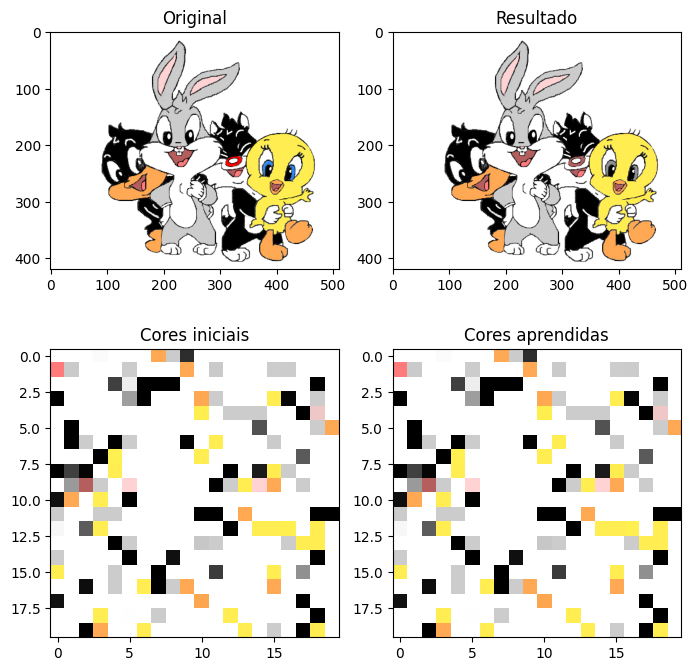

In [21]:
print('Plotando nova imagem...')

plt.figure(figsize=(7,7))

plt.figure(1)
plt.subplot(221)
plt.title('Original')
plt.imshow(img)

plt.subplot(222)
plt.title('Resultado')
plt.imshow(clustered)

plt.subplot(223)
plt.title('Cores iniciais')
plt.imshow(starting_weights, interpolation='none')

plt.subplot(224)
plt.title('Cores aprendidas')
plt.imshow(som.get_weights(), interpolation='none')

plt.tight_layout()
plt.show()